#**(10)Principal Component Analysis(Unsupervised learning, Dimensionality Reduction)**

- Principal component analysis(PCA) is a statistical technique to convert **high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset.** 
- The features are selected on the basis of **variance that they cause in the output. The feature that causes highest variance is the first principal component.** The feature that is responsible for second highest variance is considered the second principal component, and so on.

- **It is commonly used in the preprocessing data stage,Principal component analysis (PCA) is a type of dimensionality reduction algorithm** High dimensionality may cause over-fitting ,low dimensionality may cause under-fitting and best dimensionality help in best fitting for model.
- Dimensions are nothing but **features that represent the data**. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

- Note that, the dataset on which PCA technique is to be used **must be scaled.**

##**Mathematics Behind Principal Component Analysis(PCA)**

- Lets we have two dimensions(features) dataset x and y

- Since the dataset we took is 2-dimensional, this will result in a 2x2 Covariance matrix.The Covariance matrix of these two features as follows:

\begin{align}
        \ CovarianceMatrix(C)  = \begin{pmatrix}
        \ cov(x,x) & \ cov(x,y) \\\\
        \ cov(y,x) & \ cov(y,y)
        \end{pmatrix}
    \end{align}

- Covariance matrix is a square matrix that measure the variations of datapoint from the mean parameter values.

- Where, Covariance of each data point is calculated as follows;

 \begin{align}
        \ cov(x,y) = \sum_{i=1}^n \frac{(x_i -\bar{x}) (y_i -\bar{y})}
        {(n-1)}
    \end{align}


- Since we have identity matrix(I) of the same dimension as C.
\begin{align}
        \ I = \begin{pmatrix}
        \ 1 & \ 0 \\\\
        \ 0 & \ 1 
        \end{pmatrix}
    \end{align}

- Next step is to calculate the eigenvalues(λ) and eigenvectors(V) for the covariance matrix.

$$det(C- λI)=0$$

- Where,C is CovarianceMatrix,$λ$ is an eigenvalue for a matrix C , I is the identity matrix of the same dimension as C and ‘det’ is the determinant of the matrix.

- After solving above process we will get equation ,by solving this equation we will get different values of $λ$.

- For each eigenvalue($λ$), a corresponding eigen-vector(V), can be found by solving:
$$(C-λI)V = 0$$
- After solving this equation we get;
\begin{align}
        \ V = \begin{pmatrix}
        \ x_1 &  \\\\
        \ y_1 &  
        \end{pmatrix}
    \end{align}

- If we have a dataset with **$n$ variables, then we have the corresponding $n$ eigenvalues and eigenvectors.**To reduce the dimensions, **we choose the first p(nearly 2 0r 3) eigenvalues and ignore the rest.**
- Since the **first p(nearly 2 or 3) eigenvalues contain nearly 98% information of our dataset.**

- Next we form a feature vector which is a matrix of eigenvectors.
$$Feature Vector = (V_1, V_2)$$

- Finally we form the principal components by taking the **transpose of the feature vector and multiply it with the transpose of scaled version of original dataset.**
$$NewData(Principal Components)= FeatureVector^T . ScaledData^T$$



- Since the **first PC(nearly 2 or 3)  contain nearly 98% information of our dataset.**So we can take first PC(nearly 2 or 3) as a new feature for our dataset.



- **NOTE:** $PC_1$=$λ_1F_1$ +$λ_2F_2$+...+$λ_nF_n$  ,Simaraly use same formula for $PC_2$ ,Here values of  $λ_1$,$λ_2$,..,$λ_n$ different for $PC_1$,$PC_2$...$PC_n$.We take orginal feature from the client and develop internal system to convert it too PC values and gives output by model.





#**Implementing PCA with Scikit-learn:**

- The dataset consists of 150 records of Iris plant with four features: 'sepal-length', 'sepal-width', 'petal-length', and 'petal-width'. All of the features are numeric.
- The records have been classified into one of the three target classes i.e. 'Iris-setosa', 'Iris-versicolor', or 'Iris-verginica'

In [ ]:
from google.colab import drive     #mount your Google Drive in your virtual machine(VM).
drive.mount('/gdrive')              #Access  the data  drive because of different server of colab and drive.

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/gdrive/My Drive/ML Project /Feature Engineering /4.ML Algorithms/IRIS.csv',quoting=3)
                                 #Read data file with path location step by step path location from My Drive.

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now,we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ["sepal_length",	"sepal_width",	"petal_length",	"petal_width"]
X = dataset[feature_cols] # Features/independent variables
y = dataset.species # Target variable/dependent variables


# or Also we can write above code as this also. 
X = dataset.drop('species', axis=1)   #Features/independent variables
y = dataset['species']               # Target variable/dependent variables

As mentioned earlier, PCA performs best with a normalized feature set. We apply StandardScaler in Only  independent feature dataset(X).

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
sc_X= sc.fit_transform(X)  #Scalling independent featur(X) only because PCA is unsupervised learning depend only in independent features.

##**Applying PCA, Since PCA is unsupervised machine learning technique which  depends only upon the independent feature set and not the label(target) data.**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()   
principalComponents= pca.fit_transform(sc_X) #Passing scalling dataset from above.


The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components

In [ ]:
variance = pca.explained_variance_ratio_
print(variance )

[0.72770452 0.23030523 0.03683832 0.00515193]


It can be seen that first principal component is responsible for 72.22% variance. Similarly, the second principal component responsible for next 23.9% variance in the dataset,third principal component is responsible for next 3.3% and fourth principal component is not much importance. Collectively we can say that (72.22 + 23.9+3.3%) 99.51% percent of the classification information contained in the feature set is captured by the first three principal components.

Lets select first three principal component and last principal component ignore.(Similary we can also test by taking 1 principal component only, test with 2 principal component etc)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)   # use 3 principal component to train our algorithm
principalComponents= pca.fit_transform(sc_X)


Converting PCA to orginal dataframe values and give new name as principal component.

In [ ]:
principalDf = pd.DataFrame(data = principalComponents #Coverting to orginal dataframe with new column name.
             , columns = ['principal component 1','principal component 2','principal component 3'])
print(principalDf)

     principal component 1  principal component 2  principal component 3
0                -2.264542               0.505704              -0.121943
1                -2.086426              -0.655405              -0.227251
2                -2.367950              -0.318477               0.051480
3                -2.304197              -0.575368               0.098860
4                -2.388777               0.674767               0.021428
..                     ...                    ...                    ...
145               1.870522               0.382822               0.254532
146               1.558492              -0.905314              -0.025382
147               1.520845               0.266795               0.179277
148               1.376391               1.016362               0.931405
149               0.959299              -0.022284               0.528794

[150 rows x 3 columns]


Now lets join the new  principal component value with target variable .

In [ ]:
finalDf = pd.concat([principalDf, dataset[['species']]], axis = 1)
print(finalDf )

     principal component 1  principal component 2  principal component 3  \
0                -2.264542               0.505704              -0.121943   
1                -2.086426              -0.655405              -0.227251   
2                -2.367950              -0.318477               0.051480   
3                -2.304197              -0.575368               0.098860   
4                -2.388777               0.674767               0.021428   
..                     ...                    ...                    ...   
145               1.870522               0.382822               0.254532   
146               1.558492              -0.905314              -0.025382   
147               1.520845               0.266795               0.179277   
148               1.376391               1.016362               0.931405   
149               0.959299              -0.022284               0.528794   

            species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  

##**FinalDF  is our new dataset and the rest of the process is straight forward.After this we can use various Algorithm as per need in this case we'll use random forest classification for making the predictions.**

In [ ]:
#split dataset in features and target variable
new_feature_cols = ["principal component 1",'principal component 2','principal component 3']
new_X = finalDf[new_feature_cols] # Features/independent variables
new_y = finalDf.species # Target variable/dependent variables


# or Also we can write above code as this also. 
new_X = finalDf.drop('species', axis=1)   #Features/independent variables
new_y = finalDf['species']               # Target variable/dependent variables

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion="gini", max_depth=3, random_state=21) ##The maximum depth of the tree is 3.
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=21)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
pd.DataFrame(y_pred)   ##Convert numpy array generated by sklearn libraries to orginal dataframe.


,0
0,Iris-versicolor
1,Iris-setosa
2,Iris-virginica
3,Iris-versicolor
4,Iris-versicolor
5,Iris-setosa
6,Iris-versicolor
7,Iris-virginica
8,Iris-versicolor
9,Iris-versicolor


Performance Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


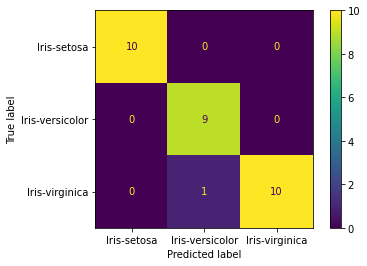

In [ ]:
from sklearn.metrics import plot_confusion_matrix
display = plot_confusion_matrix(clf ,X_test,y_test)
plt.show()

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9666666666666667


##**Note:** to apply other precision_score,recall_score,f1_score  metrix we need to convert target variable in label encoding.

##**Plotting just 2 dimensional data**

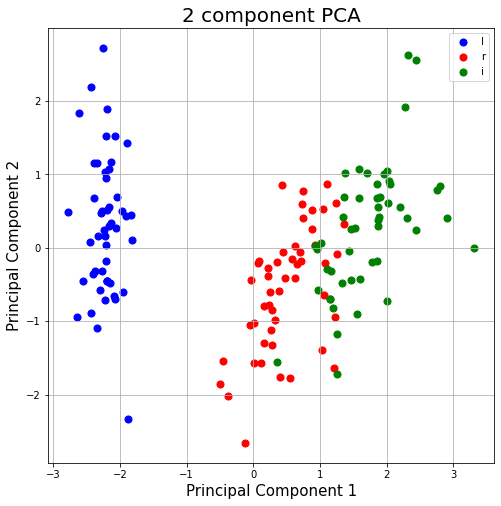

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'r', 'g']
for species, color in zip(species,colors):
    indicesToKeep = finalDf['species'] == species
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(species)
ax.grid()